In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

dataset = pd.read_csv('datasets/Social_Network_Ads.csv')
print(dataset)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=4)

scalerX = StandardScaler()
X_train_scaled = scalerX.fit_transform(X_train)
X_test_scaled = scalerX.transform(X_test)

     Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]


In [2]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [3]:
test_point = X_test_scaled[0].reshape(1,-1)
single_prediction = classifier.predict(test_point)
single_prediction
predictions = classifier.predict(X_test_scaled)

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score

confusion_matrix = confusion_matrix(y_test, predictions)
acsc = accuracy_score(y_test, predictions)

print(confusion_matrix)
print(acsc)

0

[[53  6]
 [ 3 18]]
0.8875


0

/Users/vladzams/Desktop/zfiles/r/prsn/soul/zTasks-zLog.zent/.extras/[lrnn]-Data-science-udemy-machine-learning/src/utils.py:34: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  c=ListedColormap(('salmon', 'dodgerblue'))(i),


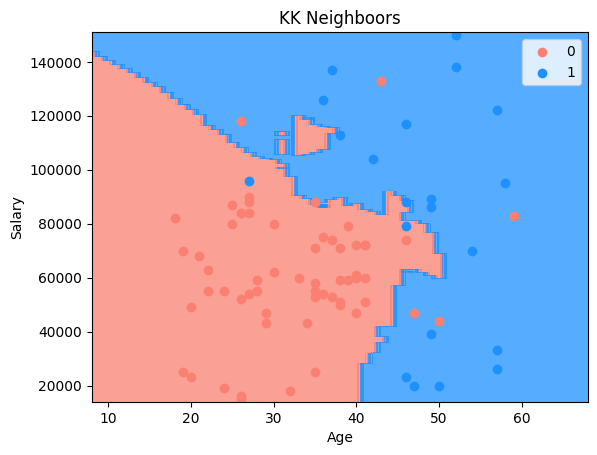

In [6]:
from utils import plot_meshgrid

plot_meshgrid(X_test, y_test, classifier, scalerX, 1,
              'KK Neighboors', 'Age', 'Salary')